<a href="https://colab.research.google.com/github/Tanishqchahal/Self_Organising_Map/blob/main/Self_Organising_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Self Organising Map

##Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Importing the dataset

In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

##Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM

In [5]:
!pip install minisom

In [6]:
from minisom import MiniSom
som = MiniSom(x = 12, y = 12, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(X, num_iteration = 100)

##Visualising the Results

In [7]:
from pylab import bone, pcolor,colorbar, plot, show

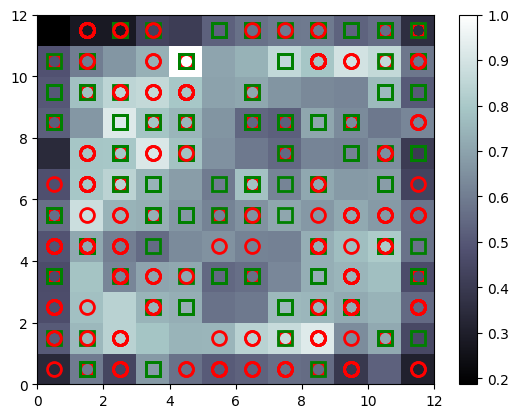

In [8]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5, w[1]+0.5, markers[y[i]], markeredgecolor = colors[y[i]], markerfacecolor = 'None', markersize = 10, markeredgewidth = 2)
show()

##Automate fraud detection

In [9]:
Threshold = 0.9
xx = np.where(som.distance_map().T > Threshold)[1]
yy = np.where(som.distance_map().T > Threshold)[0]
cords = list(zip(xx,yy))
cords

[(8, 1), (3, 7), (2, 8), (4, 10)]

##Finding the potential frauds

In [10]:
mappings = som.win_map(X)

In [11]:
fraud = mappings[cords[0]]
for cord in cords[1:]:
    if len(mappings[cord])>0:
        fraud = np.concatenate((fraud, mappings[cord]), axis = 0)

In [12]:
fraud = sc.inverse_transform(fraud)
frauds = pd.DataFrame(fraud, columns = dataset.columns[:-1])
frauds['CustomerID'] = frauds['CustomerID'].astype(int)

In [13]:
frauds

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,15767264,1.0,74.83,19.000,1.0,1.0,1.0,0.040,0.0,1.0,2.0,0.0,2.0,0.0,352.0
1,15761854,1.0,31.25,2.835,2.0,1.0,1.0,0.000,0.0,1.0,5.0,0.0,2.0,176.0,147.0
2,15633944,1.0,31.25,1.125,2.0,1.0,1.0,0.000,0.0,1.0,1.0,0.0,2.0,96.0,20.0
3,15801072,1.0,39.58,5.000,2.0,1.0,1.0,0.000,0.0,1.0,2.0,0.0,2.0,17.0,2.0
4,15573798,1.0,32.25,14.000,1.0,1.0,1.0,0.000,0.0,1.0,2.0,0.0,2.0,160.0,2.0
5,15647295,1.0,69.17,9.000,2.0,1.0,1.0,4.000,0.0,1.0,1.0,0.0,2.0,70.0,7.0
6,15734578,0.0,21.75,11.750,2.0,8.0,4.0,0.250,0.0,0.0,0.0,1.0,2.0,180.0,1.0
7,15664720,0.0,24.83,4.500,2.0,9.0,4.0,1.000,0.0,0.0,0.0,1.0,2.0,360.0,7.0
8,15641007,0.0,25.25,12.500,2.0,2.0,4.0,1.000,0.0,0.0,0.0,1.0,2.0,180.0,1063.0
9,15597536,1.0,27.67,2.000,2.0,14.0,8.0,1.000,1.0,1.0,4.0,0.0,2.0,140.0,7545.0
